# Part c and d 

In [1]:
from functions import *
mplstyle.use(['ggplot', 'fast'])
# plt.rcParams.update({
#     "text.usetex": True,       
#     "font.family": "serif",    
#     "font.size": 10, 
# })

seed = np.random.seed(2018)

# Hyperparameters from part a and b:
polynomial_degree     = 14
number_of_data_points = 1000
lambda_               = 1e-3
# Hyperparameters from part c, d e and f:
learning_rate = 0.005
n_iterations  = 100000
tolerance     = 1e-12
use_tol       = True
beta          = 0.9
beta1         = 0.9
beta2         = 0.999
epsilon       = 1e-8
lambda_       = 0.01

### Using shared functions to create dataset

In [2]:
train, test, full = make_data(number_of_data_points, seed)
x, y = full[0], full[1]

In [3]:
# We start by splitting the data into training and test sets
x_train, x_test, y_train, y_test = train[0], test[0], train[1], test[1]
x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)
x = x.reshape(-1, 1)

In [4]:
# Making a design matrix based of the scaled data
X_train = polynomial_features(x_train, polynomial_degree, intercept=True)
X_test  = polynomial_features(x_test, polynomial_degree, intercept=True)

## Part c: Writing your own gradient decent code 

Replace now the analytical expressions for the optimal parameters $\theta$ with your own gradient descent code. In this exercise we focus only on the simplest gradient descent approach with a fixed learning rate (excercises from week 37 and lecture notes from week 36).

Study and compare your results from parts a) and b) with your gradient descent approach. Discuss in particular the role of the learning rate.

In [5]:
def compare_analytical_and_gradient_decent(X_train, y_train, lr_method, learning_rate, n_iterations, tolerance, use_tol):
    if lr_method == 'OLS':
        theta  = OLS_parameters(X_train, y_train)
        theta_gd, cost_history = gradient_descent_ols(X_train, y_train, learning_rate, n_iterations, tolerance, use_tol)
    if lr_method == 'Ridge':
        theta  = OLS_parameters(X_train, y_train)
        theta_gd, cost_history = gradient_descent_ridge(X_train, y_train, lambda_, learning_rate, n_iterations, tolerance, use_tol)
    y_pred    = X_test @ theta
    y_pred_gd = X_test @ theta_gd
    mse       = MSE(y_test, y_pred)
    r2        = R2(y_test, y_pred)
    mse_gd    = MSE(y_test, y_pred_gd)
    r2_gd     = R2(y_test, y_pred_gd)
    print(f"{lr_method} Analytical Solution : MSE = {mse:.6f}, R2 = {r2:.6f}")
    print(f"{lr_method} Gradient Descent    : MSE = {mse_gd:.6f}, R2 = {r2_gd:.6f}")
    return cost_history, y_pred, y_pred_gd, theta, theta_gd

In [6]:
cost_history_ols,   y_pred_ols,   y_pred_gd_ols,   theta_ols,   theta_gd_ols   = compare_analytical_and_gradient_decent(X_train, y_train, 'OLS', learning_rate, n_iterations, tolerance, use_tol)
cost_history_ridge, y_pred_ridge, y_pred_gd_ridge, theta_ridge, theta_gd_ridge = compare_analytical_and_gradient_decent(X_train, y_train, 'Ridge', learning_rate, n_iterations, tolerance, use_tol)

OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent    : MSE = 0.000143, R2 = 0.713986
Ridge converged after 57092 iterations.
Ridge did not converge.
Ridge Analytical Solution : MSE = 0.000043, R2 = 0.913951
Ridge Gradient Descent    : MSE = 0.000227, R2 = 0.544524


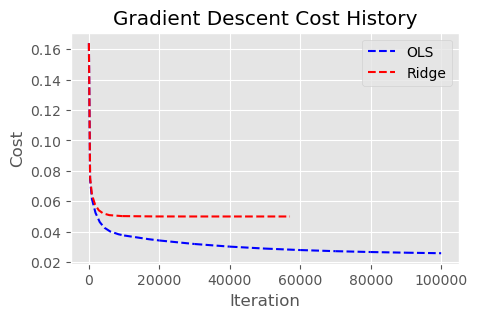

In [7]:
plt.figure(figsize=(5, 3))
plt.plot(cost_history_ols,   color='blue', label='OLS',  linestyle='--')
plt.plot(cost_history_ridge, color='red', label='Ridge', linestyle='--')
plt.title("Gradient Descent Cost History")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [8]:
# Add a list of learning rates to test
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

# Initialize dictionaries to hold cost histories for different learning rates
cost_history_ols = {}
cost_history_ridge = {}

# Iterate through the learning rates for both OLS and Ridge
for lr in learning_rates:
    cost_history_ols[lr], _, _, _, _ = compare_analytical_and_gradient_decent(X_train, y_train, 'OLS', lr, n_iterations, tolerance, use_tol)
    cost_history_ridge[lr], _, _, _, _ = compare_analytical_and_gradient_decent(X_train, y_train, 'Ridge', lr, n_iterations, tolerance, use_tol)

OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent    : MSE = 0.000193, R2 = 0.613927
Ridge did not converge.
Ridge Analytical Solution : MSE = 0.000043, R2 = 0.913951
Ridge Gradient Descent    : MSE = 0.000229, R2 = 0.540322
OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent    : MSE = 0.000143, R2 = 0.713986
Ridge converged after 57092 iterations.
Ridge did not converge.
Ridge Analytical Solution : MSE = 0.000043, R2 = 0.913951
Ridge Gradient Descent    : MSE = 0.000227, R2 = 0.544524
OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent    : MSE = 0.000132, R2 = 0.736116
Ridge converged after 30066 iterations.
Ridge did not converge.
Ridge Analytical Solution : MSE = 0.000043, R2 = 0.913951
Ridge Gradient Descent    : MSE = 0.000227, R2 = 0.544541
OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent

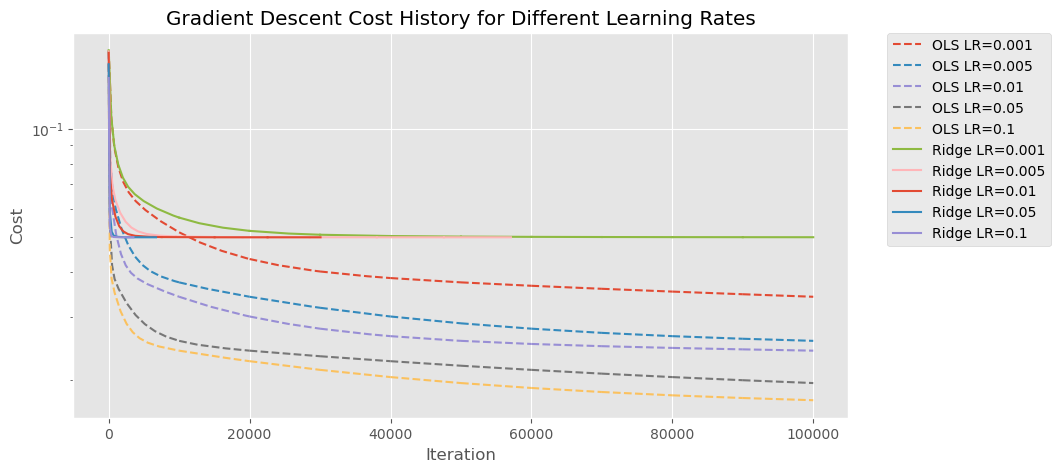

In [9]:
# Plot the cost histories for OLS and Ridge
plt.figure(figsize=(10, 5))

# Plot OLS cost histories
for lr, costs in cost_history_ols.items():
    plt.plot(costs, label=f'OLS LR={lr}', linestyle='--')

# Plot Ridge cost histories
for lr, costs in cost_history_ridge.items():
    plt.plot(costs, label=f'Ridge LR={lr}')

plt.title("Gradient Descent Cost History for Different Learning Rates")
plt.xlabel("Iteration")
plt.ylabel("Cost")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.yscale('log')  # Use log scale for better visibility of cost differences
plt.show()

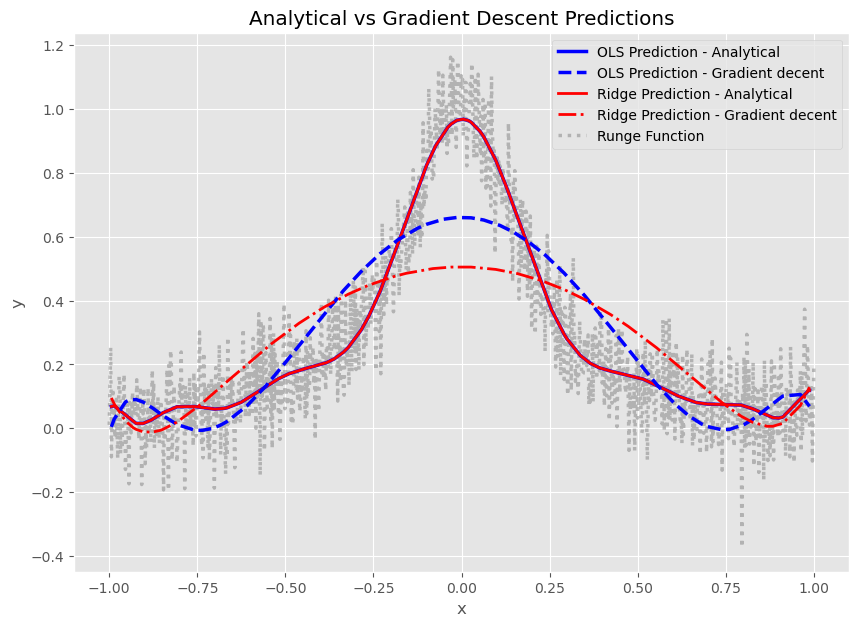

In [10]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(10, 7))
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],      color='blue', label='OLS Prediction - Analytical',       zorder=5, linewidth=2.5)
plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices],   color='blue', label='OLS Prediction - Gradient decent',  zorder=8, linewidth=2.5, linestyle='--')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices],    color='red', label='Ridge Prediction - Analytical',      zorder=5, linewidth=2)
plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color='red', label='Ridge Prediction - Gradient decent', zorder=8, linewidth=2, linestyle='-.')
# Also plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Analytical vs Gradient Descent Predictions")
plt.legend()
plt.show()

In [11]:
# Iterate through the learning rates for both OLS and Ridge
predictions_ols = {}
predictions_ridge = {}
cost_histories_ols = {}
cost_histories_ridge = {}

for lr in learning_rates:
    # Get predictions and cost history for OLS
    cost_histories_ols[lr], y_pred_ols, y_pred_gd_ols, theta_ols, theta_gd_ols = compare_analytical_and_gradient_decent(
        X_train, y_train, 'OLS', lr, n_iterations, tolerance, use_tol)
    
    # Store the predictions in the dictionary
    predictions_ols[lr] = (y_pred_ols, y_pred_gd_ols)

    # Get predictions and cost history for Ridge
    cost_histories_ridge[lr], y_pred_ridge, y_pred_gd_ridge, theta_ridge, theta_gd_ridge = compare_analytical_and_gradient_decent(
        X_train, y_train, 'Ridge', lr, n_iterations, tolerance, use_tol)
    
    # Store the predictions in the dictionary
    predictions_ridge[lr] = (y_pred_ridge, y_pred_gd_ridge)

OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent    : MSE = 0.000193, R2 = 0.613927
Ridge did not converge.
Ridge Analytical Solution : MSE = 0.000043, R2 = 0.913951
Ridge Gradient Descent    : MSE = 0.000229, R2 = 0.540322
OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent    : MSE = 0.000143, R2 = 0.713986
Ridge converged after 57092 iterations.
Ridge did not converge.
Ridge Analytical Solution : MSE = 0.000043, R2 = 0.913951
Ridge Gradient Descent    : MSE = 0.000227, R2 = 0.544524
OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent    : MSE = 0.000132, R2 = 0.736116
Ridge converged after 30066 iterations.
Ridge did not converge.
Ridge Analytical Solution : MSE = 0.000043, R2 = 0.913951
Ridge Gradient Descent    : MSE = 0.000227, R2 = 0.544541
OLS did not converge.
OLS Analytical Solution : MSE = 0.000043, R2 = 0.913951
OLS Gradient Descent

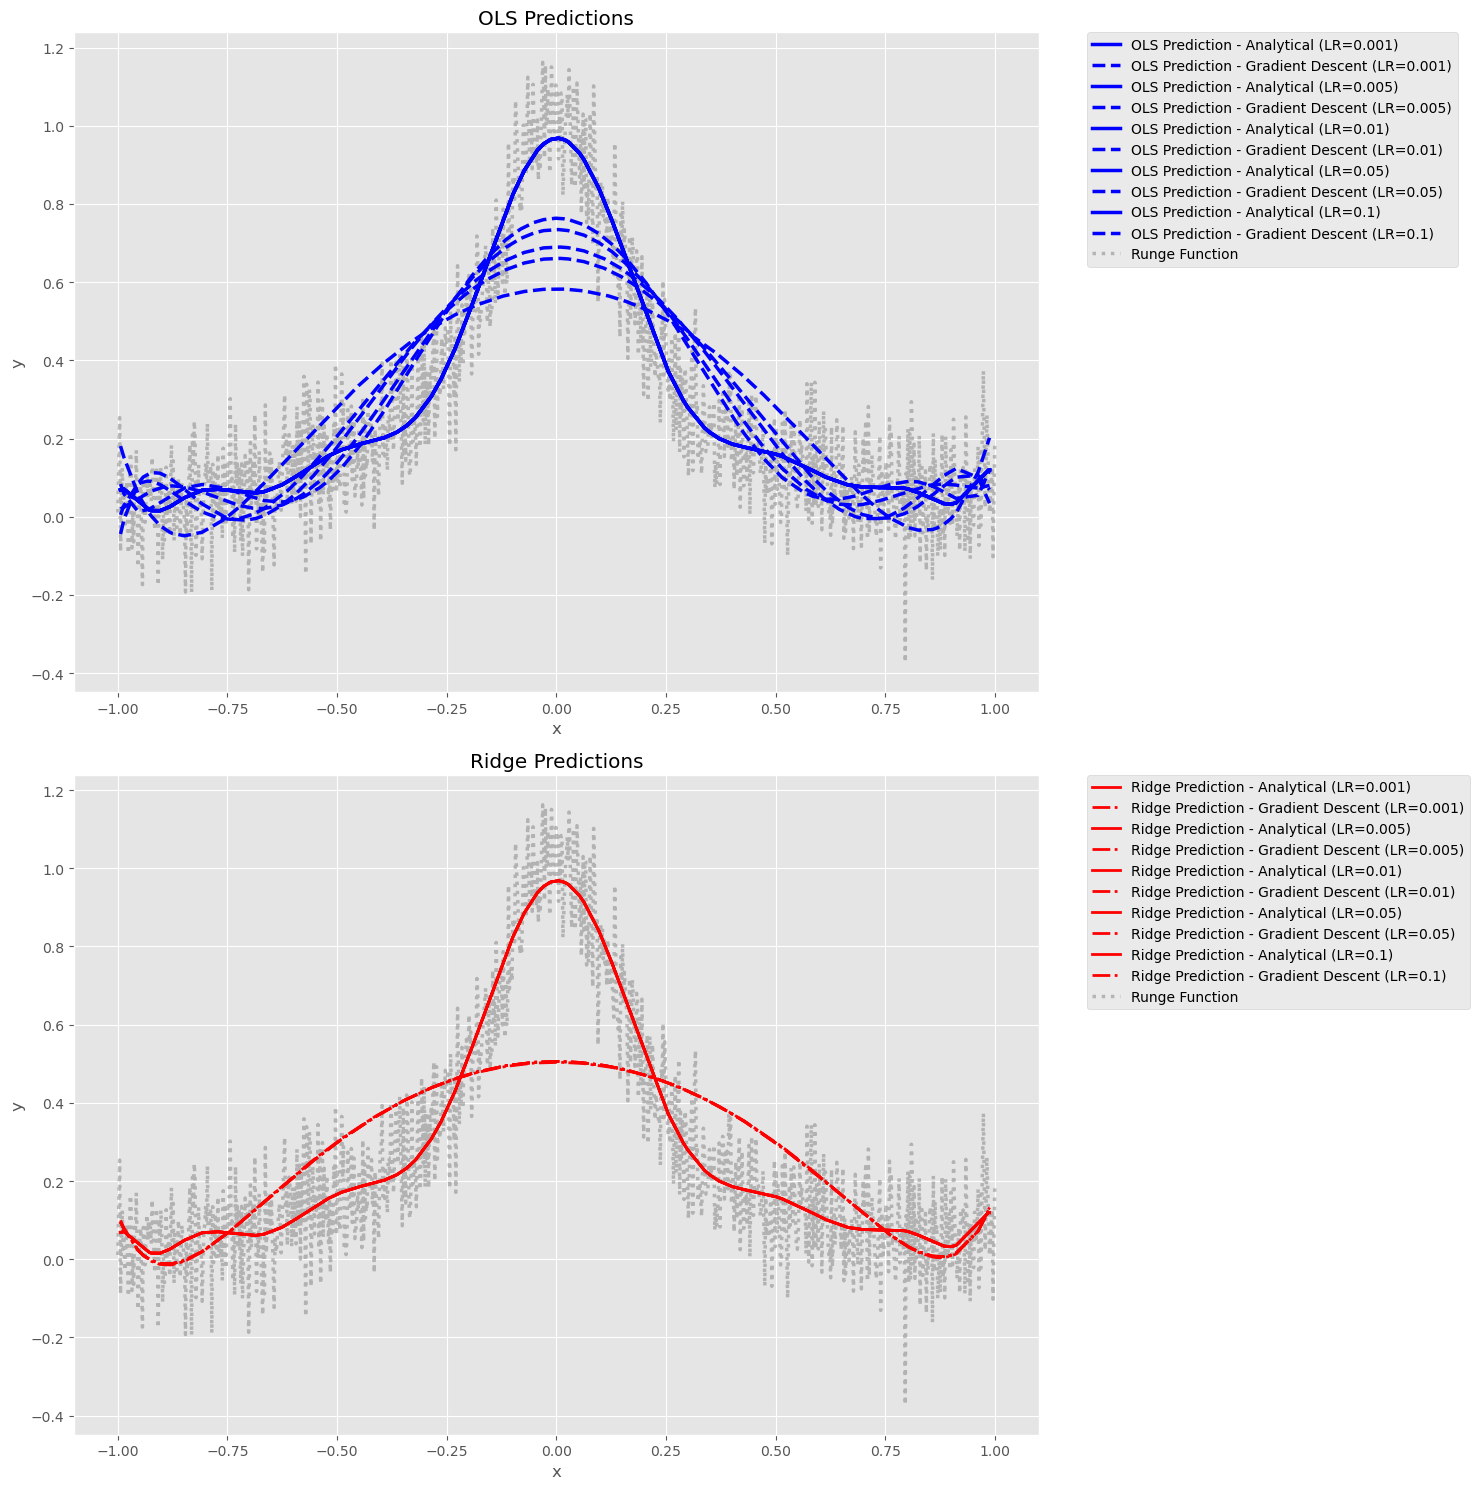

In [12]:
# Plot the results from OLS and Ridge on the test data for different learning rates
plt.figure(figsize=(15, 15))

# For each learning rate, plot the predictions
for lr in learning_rates:
    y_pred_ols, y_pred_gd_ols     = predictions_ols[lr]
    y_pred_ridge, y_pred_gd_ridge = predictions_ridge[lr]
    
    sort_indices = np.argsort(x_test.flatten())
    
    plt.subplot(2, 1, 1)
    plt.plot(x_test[sort_indices], y_pred_ols[sort_indices], color='blue', label=f'OLS Prediction - Analytical (LR={lr})', zorder=5, linewidth=2.5)
    plt.plot(x_test[sort_indices], y_pred_gd_ols[sort_indices], color='blue', label=f'OLS Prediction - Gradient Descent (LR={lr})', zorder=8, linewidth=2.5, linestyle='--')
    
    plt.subplot(2, 1, 2)
    plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red', label=f'Ridge Prediction - Analytical (LR={lr})', zorder=5, linewidth=2)
    plt.plot(x_test[sort_indices], y_pred_gd_ridge[sort_indices], color='red', label=f'Ridge Prediction - Gradient Descent (LR={lr})', zorder=8, linewidth=2, linestyle='-.')

# Plot the true function
sort_indices_full = np.argsort(x.flatten())
plt.subplot(2, 1, 1)
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("OLS Predictions")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 2)
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ridge Predictions")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()


## Part d: Including momentum and more advanced ways to update the learning the rate

We keep our focus on OLS and Ridge regression and update our code for
the gradient descent method by including **momentum**, **ADAgrad**,
**RMSprop** and **ADAM** as methods fro iteratively updating your learning
rate. Discuss the results and compare the different methods applied to
the one-dimensional Runge function. The lecture notes from week 37 contain several examples on how to implement these methods.

In [13]:
methods = ['gd', 'momentum', 'adagrad', 'rmsprop', 'adam']

In [14]:
results = {}
for method in methods:
    theta_OLS, cost_history_OLS     = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ols',   learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Ridge, cost_history_Ridge = gradient_descent_advanced(X_train, y_train, method=method, lr_method='ridge', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    theta_Lasso, cost_history_Lasso = gradient_descent_advanced(X_train, y_train, method=method, lr_method='lasso', learning_rate=learning_rate, n_iterations=n_iterations, tol=tolerance, use_tol=use_tol, beta=beta, beta1=beta1, beta2=beta2, epsilon=epsilon, lambda_=lambda_)
    y_pred_OLS   = X_test @ theta_OLS
    y_pred_Ridge = X_test @ theta_Ridge
    y_pred_Lasso = X_test @ theta_Lasso
    mse_OLS   = MSE(y_test, y_pred_OLS)
    r2_OLS    = R2(y_test, y_pred_OLS)
    mse_Ridge = MSE(y_test, y_pred_Ridge)
    r2_Ridge  = R2(y_test, y_pred_Ridge)
    mse_Lasso = MSE(y_test, y_pred_Lasso)
    r2_Lasso  = R2(y_test, y_pred_Lasso)
    results[method] = {
        'theta_OLS'         : theta_OLS,
        'cost_history_OLS'  : cost_history_OLS,
        'mse_OLS'           : mse_OLS,
        'r2_OLS'            : r2_OLS,
        'theta_Ridge'       : theta_Ridge,
        'cost_history_Ridge': cost_history_Ridge,
        'mse_Ridge'         : mse_Ridge,
        'r2_Ridge'          : r2_Ridge,
        'theta_Lasso'       : theta_Lasso,
        'cost_history_Lasso': cost_history_Lasso,
        'mse_Lasso'         : mse_Lasso,
        'r2_Lasso'          : r2_Lasso
    }
    print(f"OLS   : {method}: MSE = {mse_OLS:.6f}, R2 = {r2_OLS:.6f}")
    print(f"Ridge : {method}: MSE = {mse_Ridge:.6f}, R2 = {r2_Ridge:.6f}")
    print(f"Lasso : {method}: MSE = {mse_Lasso:.6f}, R2 = {r2_Lasso:.6f}")
    print()

ridge: gd converged after 57092 iterations.
OLS   : gd: MSE = 0.000143, R2 = 0.713986
Ridge : gd: MSE = 0.000227, R2 = 0.544524
Lasso : gd: MSE = 0.000227, R2 = 0.545625

ridge: momentum converged after 6663 iterations.
OLS   : momentum: MSE = 0.000104, R2 = 0.790533
Ridge : momentum: MSE = 0.000227, R2 = 0.544564
Lasso : momentum: MSE = 0.000228, R2 = 0.542587

ridge: adagrad converged after 41990 iterations.
OLS   : adagrad: MSE = 0.000144, R2 = 0.711073
Ridge : adagrad: MSE = 0.000227, R2 = 0.544516
Lasso : adagrad: MSE = 0.000227, R2 = 0.544536

ridge: rmsprop converged after 565 iterations.
OLS   : rmsprop: MSE = 0.000073, R2 = 0.853934
Ridge : rmsprop: MSE = 0.000227, R2 = 0.544633
Lasso : rmsprop: MSE = 0.000229, R2 = 0.541631

ols: adam converged after 63031 iterations.
ridge: adam converged after 651 iterations.
OLS   : adam: MSE = 0.000058, R2 = 0.884295
Ridge : adam: MSE = 0.000227, R2 = 0.544577
Lasso : adam: MSE = 0.000227, R2 = 0.544554



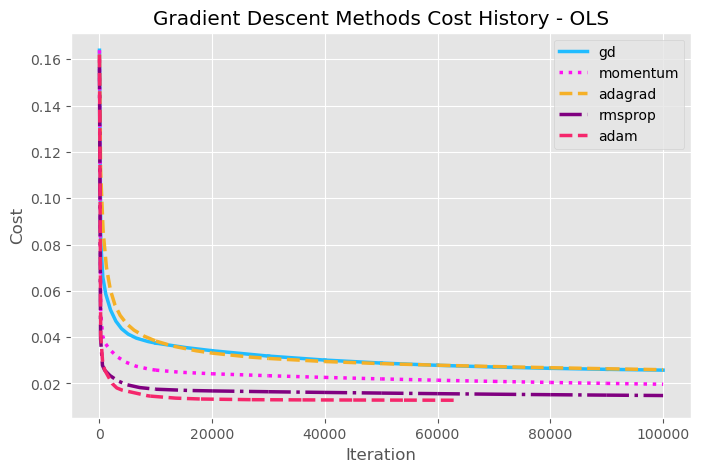

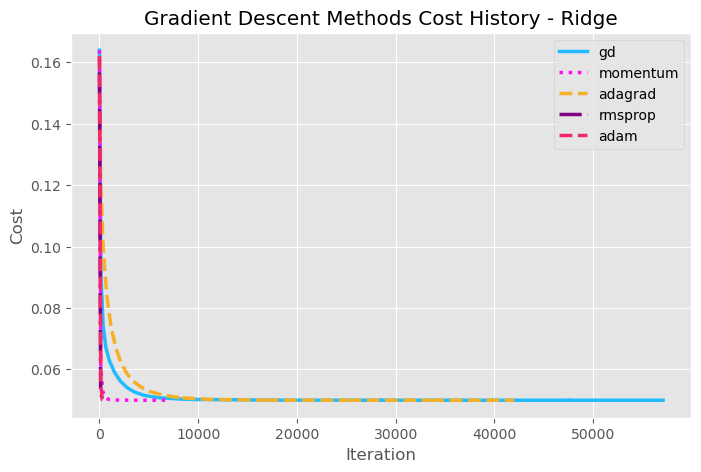

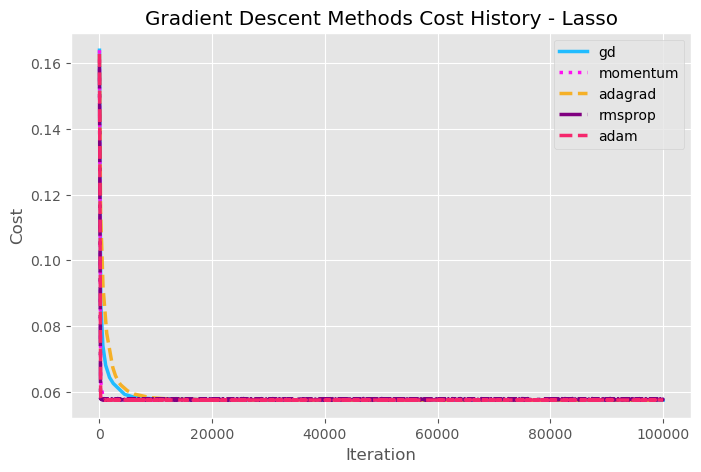

In [15]:
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': '#F5276C'}
linestyle_cost_history = {'gd': '-', 'momentum': ':', 'adagrad': '--', 'rmsprop': '-.', 'adam': '--'}
# Plot cost history for all methods
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_OLS'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - OLS")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Ridge'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - Ridge")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()
plt.figure(figsize=(8, 5))
for method in methods:
    plt.plot(results[method]['cost_history_Lasso'], label=method, linewidth=2.5, linestyle=linestyle_cost_history[method], alpha=1, color=colors_cost_history[method])
plt.title("Gradient Descent Methods Cost History - Lasso")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend()
plt.show()

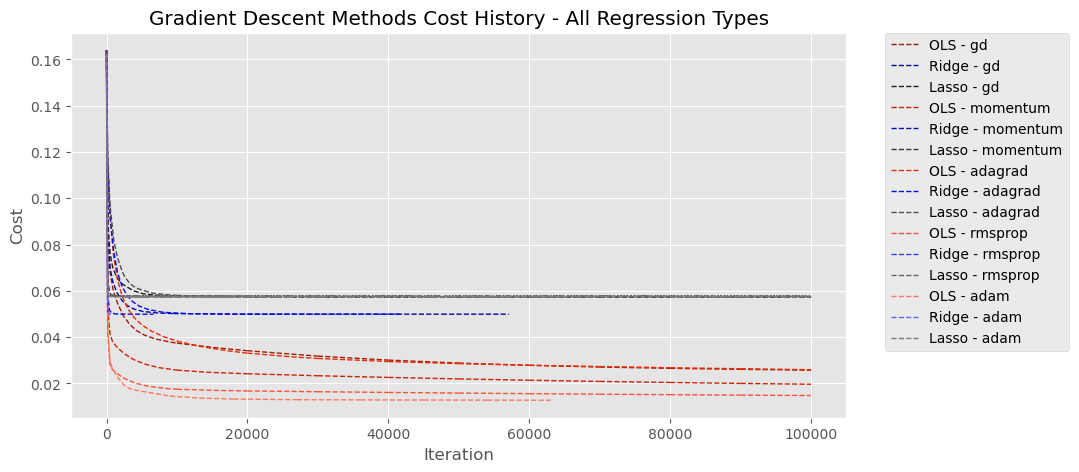

In [16]:
# Same plots for all regression types in one figure, with one linestyles per regression type, and different colors for the different  methods
plt.figure(figsize=(10, 5))
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': '#5F64FC'}
colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': '#7C7C7C'}
for method in methods:
    plt.plot(results[method]['cost_history_OLS'],   label=f'OLS - {method}',   linewidth=1, linestyle='--', color=colors_OLS[method])
    plt.plot(results[method]['cost_history_Ridge'], label=f'Ridge - {method}', linewidth=1, linestyle='--', color=colors_Ridge[method])
    plt.plot(results[method]['cost_history_Lasso'], label=f'Lasso - {method}', linewidth=1, linestyle='--', color=colors_Lasso[method])
plt.title("Gradient Descent Methods Cost History - All Regression Types")
plt.xlabel("Iteration")
plt.ylabel("Cost")  
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

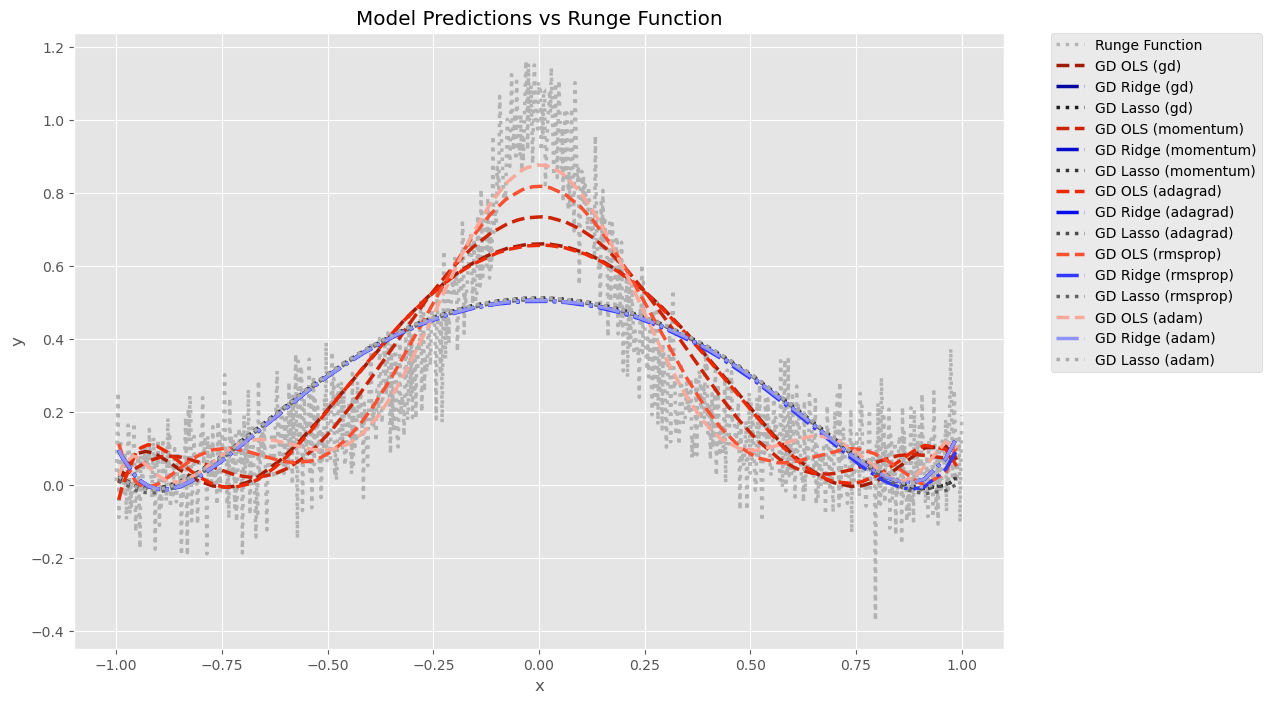

In [17]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(12, 8))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
#plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=5, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge - Analytical', zorder=8, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': "#F9A89A"}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': "#9094FA"}
colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': "#ABABAB"}
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=2.5, linestyle='--', color=colors_OLS[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.', color=colors_Ridge[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':',  color=colors_Lasso[method])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Predictions vs Runge Function")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

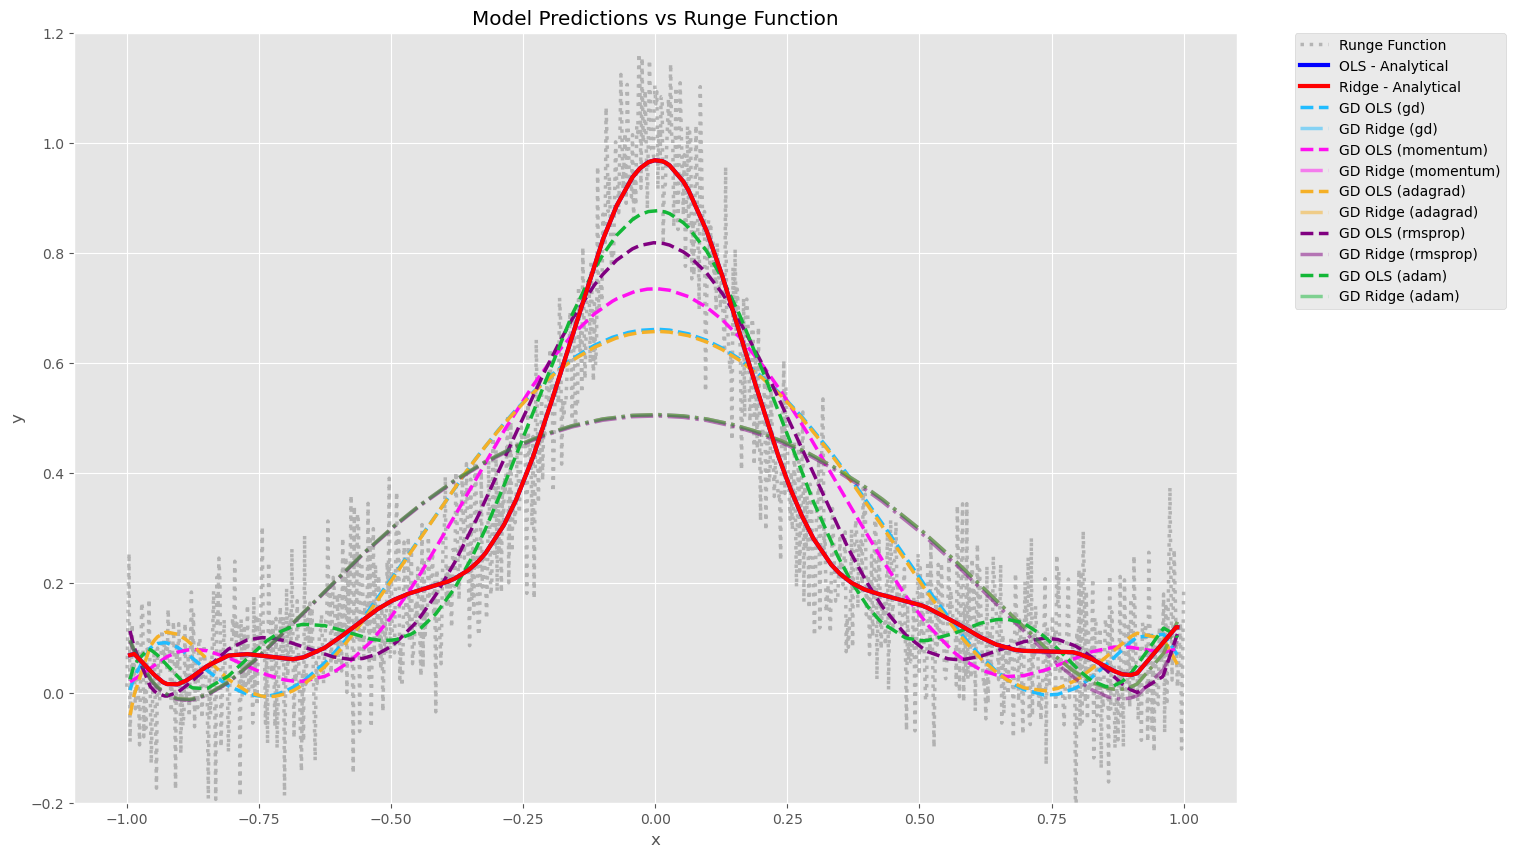

In [18]:
# Plot the results from OLS and Ridge on the test data
plt.figure(figsize=(15,10))
# Plot the true function, however we need to sort x for this
sort_indices_full = np.argsort(x.flatten())
plt.plot(x[sort_indices_full], y[sort_indices_full], color='gray', linestyle=':', label='Runge Function', linewidth=2.5, alpha=0.5)
# Sort x_test and corresponding predictions for better plotting
sort_indices = np.argsort(x_test.flatten())
plt.plot(x_test[sort_indices], y_pred_ols[sort_indices],   color='blue', label='OLS - Analytical',   zorder=5, linewidth=3, linestyle='-')
plt.plot(x_test[sort_indices], y_pred_ridge[sort_indices], color='red',  label='Ridge - Analytical', zorder=8, linewidth=3, linestyle='-')
#plt.plot(x_test[sort_indices], y_pred_Lasso[sort_indices], color='Black',  label='Lasso Prediction', zorder=8, linewidth=2.5, linestyle='-')
colors_OLS   = {'gd': '#A01B03', 'momentum': '#CD2204', 'adagrad': '#ED2905', 'rmsprop': '#FB5032', 'adam': '#FC775F'}
colors_Ridge = {'gd': '#0308A0', 'momentum': '#040BCD', 'adagrad': '#050DED', 'rmsprop': '#3239FB', 'adam': '#5F64FC'}
colors_cost_history    = {'gd': '#21BCFF', 'momentum': '#FF10F0', 'adagrad': '#F5B027', 'rmsprop': '#800080', 'adam': "#13B737"}
#colors_Lasso = {'gd': '#1D1D1D', 'momentum': '#353535', 'adagrad': '#4C4C4C', 'rmsprop': '#646464', 'adam': '#7C7C7C'}
for method in methods:
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_OLS'],   label=f'GD OLS ({method})',   linewidth=2.5, linestyle='--', color=colors_cost_history[method])
    plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Ridge'], label=f'GD Ridge ({method})', linewidth=2.5, linestyle='-.', color=colors_cost_history[method], alpha=0.5)
    #plt.plot(x_test[sort_indices], X_test[sort_indices] @ results[method]['theta_Lasso'], label=f'GD Lasso ({method})', linewidth=2.5, linestyle=':',  color=colors_Lasso[method])
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-0.2,1.2)
plt.title("Model Predictions vs Runge Function")
# Making the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

ridge: momentum converged after 30061 iterations.
ridge: momentum converged after 18699 iterations.
ridge: momentum converged after 6663 iterations.
ridge: momentum converged after 3381 iterations.
ridge: momentum converged after 1597 iterations.
ridge: rmsprop converged after 713 iterations.
ridge: rmsprop converged after 623 iterations.
ridge: rmsprop converged after 565 iterations.
ridge: rmsprop converged after 607 iterations.
ridge: rmsprop converged after 2500 iterations.
ridge: adam converged after 651 iterations.
ridge: adam converged after 651 iterations.
ridge: adam converged after 651 iterations.
ridge: adam converged after 651 iterations.
ridge: adam converged after 651 iterations.


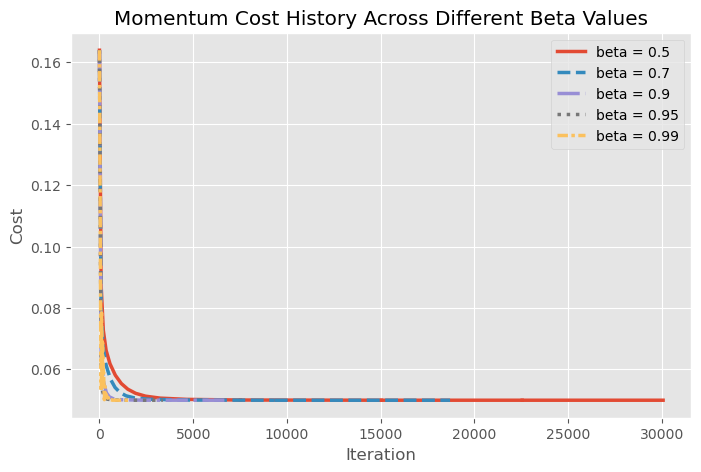

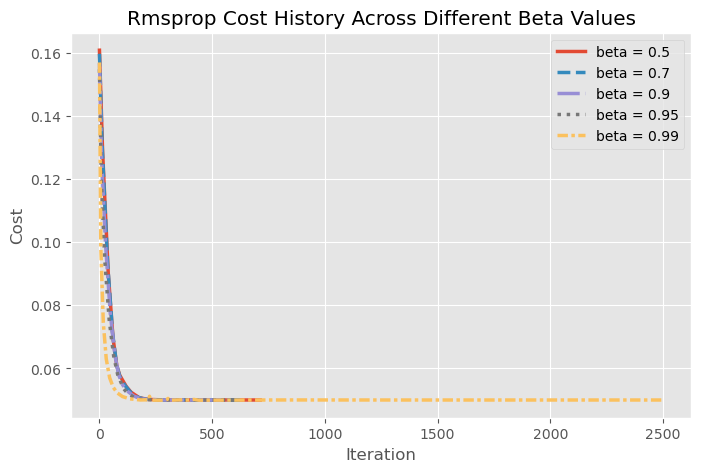

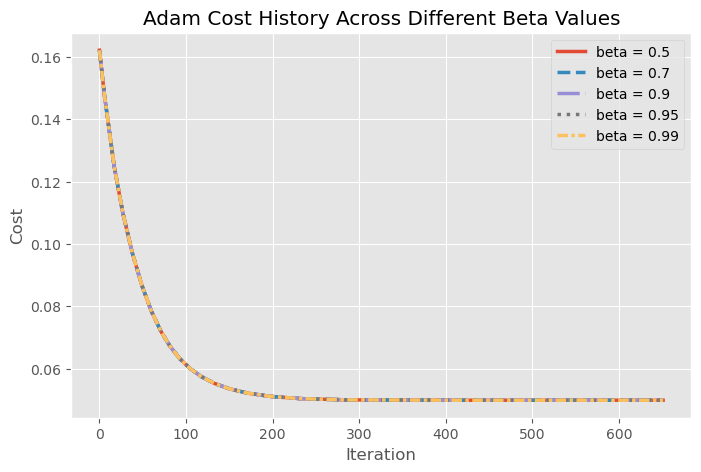

In [19]:
# Define beta values to test
beta_values = [0.5, 0.7, 0.9, 0.95, 0.99]
methods_with_beta = ['momentum', 'rmsprop', 'adam']

# Initialize an empty dictionary to store results for each beta value per method
results_by_beta = {method: {} for method in methods_with_beta}

for method in methods_with_beta:
    for beta in beta_values:
        theta, cost_history = gradient_descent_advanced(
            X_train, 
            y_train, 
            method=method, 
            lr_method='ridge', 
            learning_rate=learning_rate, 
            n_iterations=n_iterations, 
            tol=tolerance, 
            use_tol=use_tol, 
            beta=beta, 
            beta1=beta1, 
            beta2=beta2, 
            epsilon=epsilon, 
            lambda_=lambda_
        )
        results_by_beta[method][beta] = cost_history

# Plot cost history for each method separately
beta_linestyles = {0.5: '-', 0.7: '--', 0.9: '-.', 0.95: ':', 0.99: (0, (3, 1, 1, 1))}  # Custom linestyle for each beta
for method in methods_with_beta:
    plt.figure(figsize=(8, 5))
    for beta in beta_values:
        plt.plot(results_by_beta[method][beta], label=f'beta = {beta}', linewidth=2.5, linestyle=beta_linestyles[beta])

    plt.title(f"{method.capitalize()} Cost History Across Different Beta Values")
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()
